## Testing a Class

<pre>
We’ll write tests for a class. We’ll use classes in many of our own programs,
so it’s helpful to be able to prove that our classes work correctly. If we have
passing tests for a class we’re working on, we can be confident that improvements
we make to the class won’t accidentally break its current behavior.
</pre>

### A Variety of Assert Methods
<pre>
Assert methods test whether a condition we believe is true at a specific point 
in our code is indeed true. 
If the condition is true as expected, our assumption about how that part of our 
program behaves is confirmed; we can be confident that no errors exist. If the 
condition we assume is true is actually not true, Python raises an exception.

Followings are  six commonly used assert methods:
</pre>
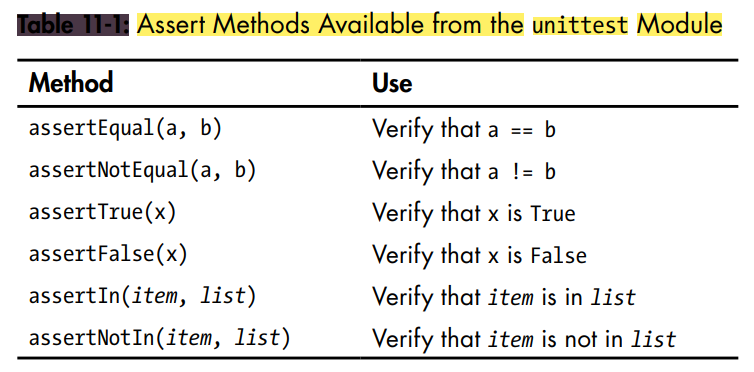
<pre>
<strong>Learn more:</strong>
<a href='https://www.w3schools.com/python/ref_keyword_assert.asp#:~:text=The%20assert%20keyword%20is%20used,False%2C%20check%20the%20example%20below.'>Read about Python's assert keyword.</a>
</pre>

### A Class to Test
<pre>
Testing a class is similar to testing a function—much of your work involves
testing the behavior of the methods in the class.
There are a few differences.
</pre>

In [5]:
#  Write a class that helps administer anonymous surveys.

# survey.py

class AnonymousSurvey:
    """Collect answers to an anonymous survey question."""
    
    def __init__(self, question):
        """Store a question, and prepare to store responses."""
        self.question = question
        self.responses = []
        
    def show_question(self):
        """Show the survey question."""
        print(self.question)
        
    def store_single_response(self, new_response):
        """Store a single response to the survey."""
        self.responses.append(new_response)
        
    def show_results(self):
        """Show all the responses that have been given."""
        print("Survey results:")
        for response in self.responses:
            print(f'- {response}')

In [4]:
# To show that the AnonymousSurvey class works, let’s write a program that uses the class.

# language_survey.py

from survey import AnonymousSurvey

# Define a question, and make a survey.
question = "What language do you learn first to speak?"
my_survey = AnonymousSurvey(question)

# Show the question, and store the responses to the question.
my_survey.show_question()
print("Enter 'q' at anytime to quit.\n")
while True:
    response = input("Language: ")
    if response == 'q':
        break
    my_survey.store_single_response(response)
    
# Show the survey result
print("\nThank you to everyone who participated in the survey!")
my_survey.show_results()

What language do you learn first to speak?
Enter 'q' at anytime to quit.

Language: Hindi
Language: Maithili
Language: English
Language: French
Language: Spanish
Language: German
Language: Chinese
Language: Urdu
Language: Punjabi
Language: Telugu
Language: q

Thank you to everyone who participated in the survey!
Survey results:
- Hindi
- Maithili
- English
- French
- Spanish
- German
- Chinese
- Urdu
- Punjabi
- Telugu


### Testing the AnonymousSurvey Class


In [14]:
# Write a test method to test store_single_response function work or not.
# We write a test that verifies one aspect of the way AnonymousSurvey behaves.
# We’ll write a test to verify that a single response to the survey question is
# stored properly. We’ll use the assertIn() method to verify that the response
# is in the list of responses after it’s been stored.

# test_survey.py

import unittest
from survey import AnonymousSurvey

class TestAnonymousSurvey(unittest.TestCase):
    """Test for the class AnonymousSurvey."""
    
    def test_store_single_response(self):
        """Test that a single response is stored properly."""
        question = "What language did you learn first to speak?"
        my_survey = AnonymousSurvey(question)
        my_survey.store_single_response('Hindi')
        self.assertIn('Hindi', my_survey.responses)
    
if __name__ == '__main__':
    unittest.main()

E
ERROR: C:\Users\ishan\AppData\Roaming\jupyter\runtime\kernel-94d26add-c75c-40d9-9fc2-b25ad698a7f8 (unittest.loader._FailedTest)
----------------------------------------------------------------------
AttributeError: module '__main__' has no attribute 'C:\Users\ishan\AppData\Roaming\jupyter\runtime\kernel-94d26add-c75c-40d9-9fc2-b25ad698a7f8'

----------------------------------------------------------------------
Ran 1 test in 0.002s

FAILED (errors=1)


SystemExit: True

C:\Users\ishan\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3351: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [15]:
# running test_survey.py in integrated terminal, see below image for reference

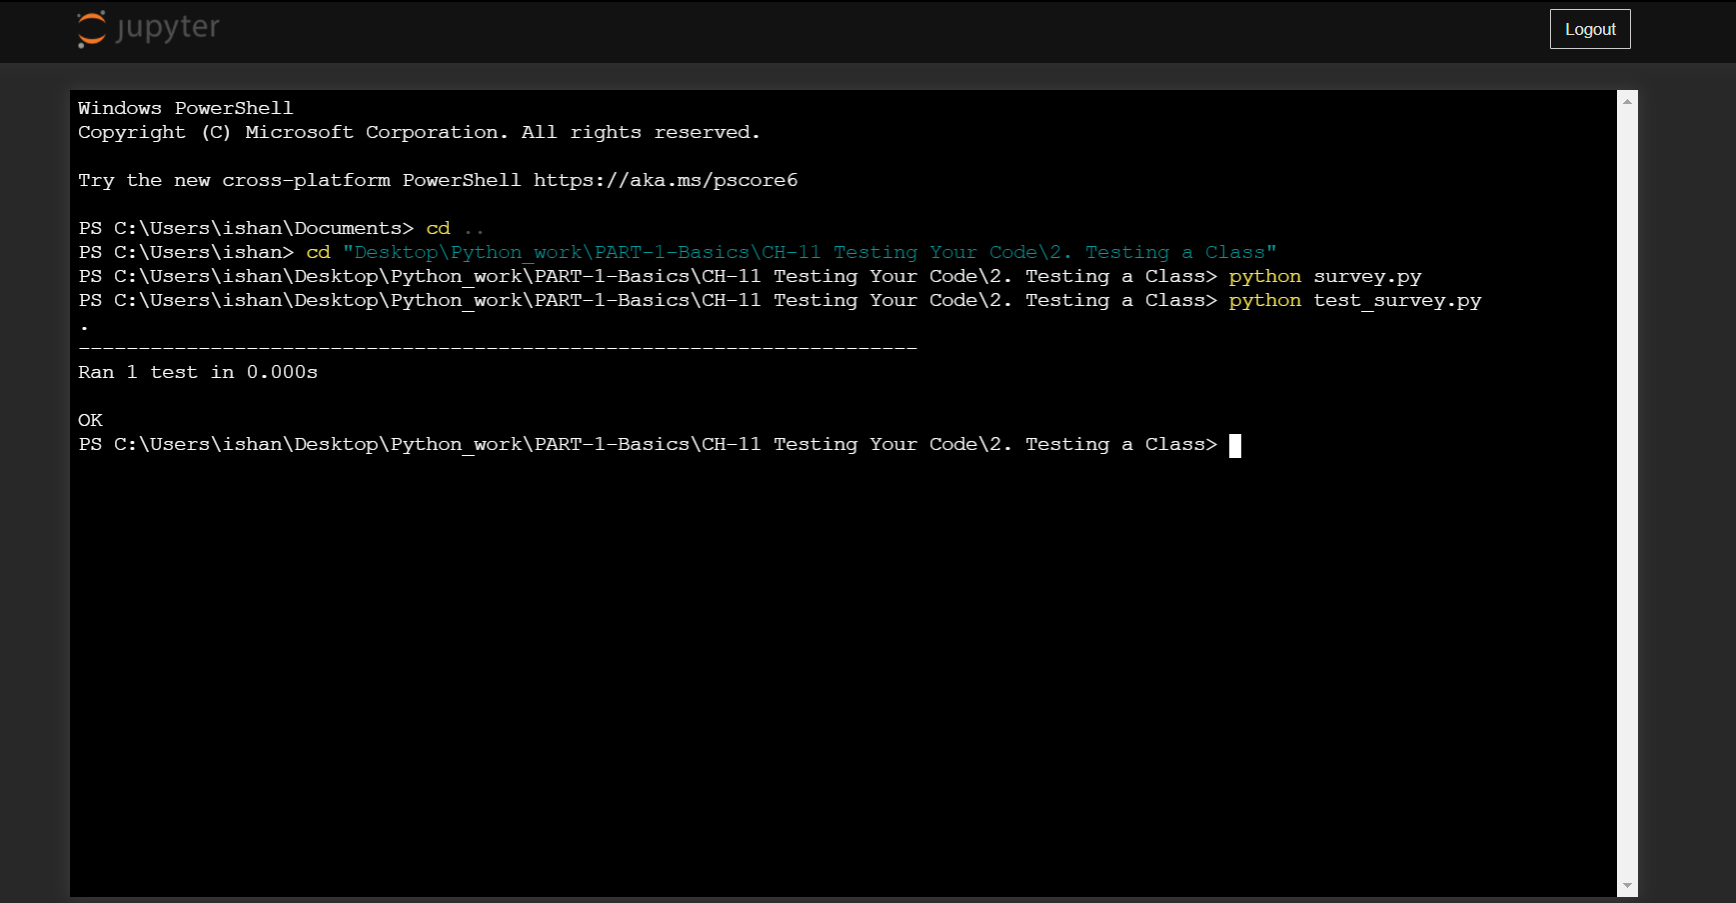

In [1]:
# This is good, but a survey is useful only if it generates more than one
# response. Let’s verify that three responses can be stored correctly. To do
# this, we add another method to TestAnonymousSurvey

# test_survey.py (updated)

import unittest
from survey import AnonymousSurvey

class TestAnonymousSurvey(unittest.TestCase):
    """Test for the class AnonymousSurvey."""
    
    def test_store_single_response(self):
        """Test that a single response is stored properly."""
        question = "What language did you learn first to speak?"
        my_survey = AnonymousSurvey(question)
        my_survey.store_single_response('Hindi')
        self.assertIn('Hindi', my_survey.responses)
        
    def test_store_three_response(self):
        """Test that three responses are stored properly."""
        question = "What language did you learn first to speak?"
        my_survey = AnonymousSurvey(question)
        responses = ['Hindi', 'English', 'Sanskrit']
        for response in responses:
            my_survey.store_single_response(response)
        for response in responses:
            self.assertIn(response, my_survey.responses)
        
if __name__ == '__main__':
    unittest.main()

E
ERROR: C:\Users\ishan\AppData\Roaming\jupyter\runtime\kernel-d543637e-facd-4318-8802-b33436d827e9 (unittest.loader._FailedTest)
----------------------------------------------------------------------
AttributeError: module '__main__' has no attribute 'C:\Users\ishan\AppData\Roaming\jupyter\runtime\kernel-d543637e-facd-4318-8802-b33436d827e9'

----------------------------------------------------------------------
Ran 1 test in 0.006s

FAILED (errors=1)


SystemExit: True

C:\Users\ishan\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3351: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [2]:
# running test_survey.py (updated) in integrated terminal, see below image for reference

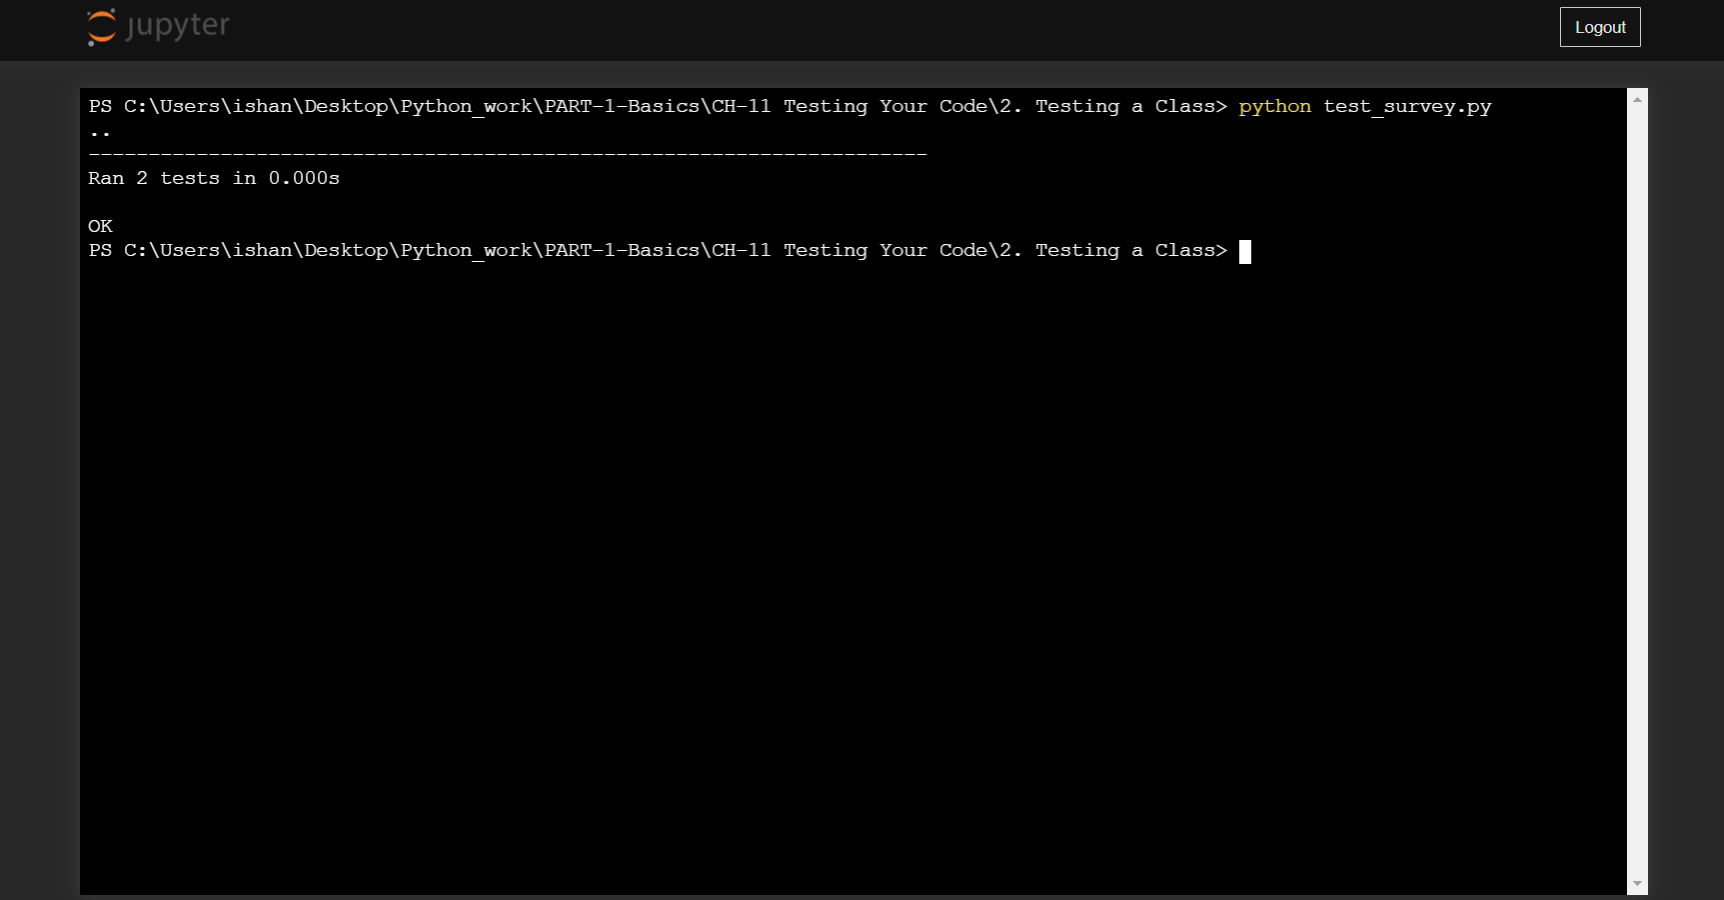

<pre>
This works perfectly. However, these tests are a bit repetitive, so we’ll
use another feature of unittest to make them more efficient.
</pre>

### The setUp() Method
<pre>
In test_survey.py we created a new instance of AnonymousSurvey in each test
method, and we created new responses in each method. 
<span style= 'background-color: yellow'>The unittest.TestCase class has a <span style= 'color: rgb(100,200,200)'>setUp() method</span> that allows us to create 
these objects once and then use them in each of our test methods. </span>
<span style= 'color: rgb(100,200,200)'>When we include a setUp() method in a TestCase class, Python runs the setUp() 
method before running each method starting with test_. 
Any objects created in the setUp() method are then available in each test 
method we write.</span>
</pre>

In [ ]:
# test_survey.py (updated)

import unittest
from survey import AnonymousSurvey

class TestAnonymousSurvey(unittest.TestCase):
    """Test for the class AnonymousSurvey."""
    
    def setUp(self):
        """Create a survey and a set of responses for use in all test methods."""
        question = "What language did you learn first to speak?"
        self.survey = AnonymousSurvey(question)
        self.responses = ['Hindi', 'English', 'French']
        
    def test_store_single_response(self):
        """Is single response stored properly?"""
        self.survey.store_single_response(self.responses[0])
        self.assertIn(self.responses[0], self.survey.responses)
        
    def test_store_three_responses(self):
        """Are multiple responses stored properly?"""
        for response in self.responses:
            self.survey.store_single_response(response)
        for response in self.responses:
            self.assertIn(response, self.survey.responses)
            
if __name__ == '__main__':
    unittest.main()

In [ ]:
# executed test_survey.py (updated) in integrated terminal, see below image for reference

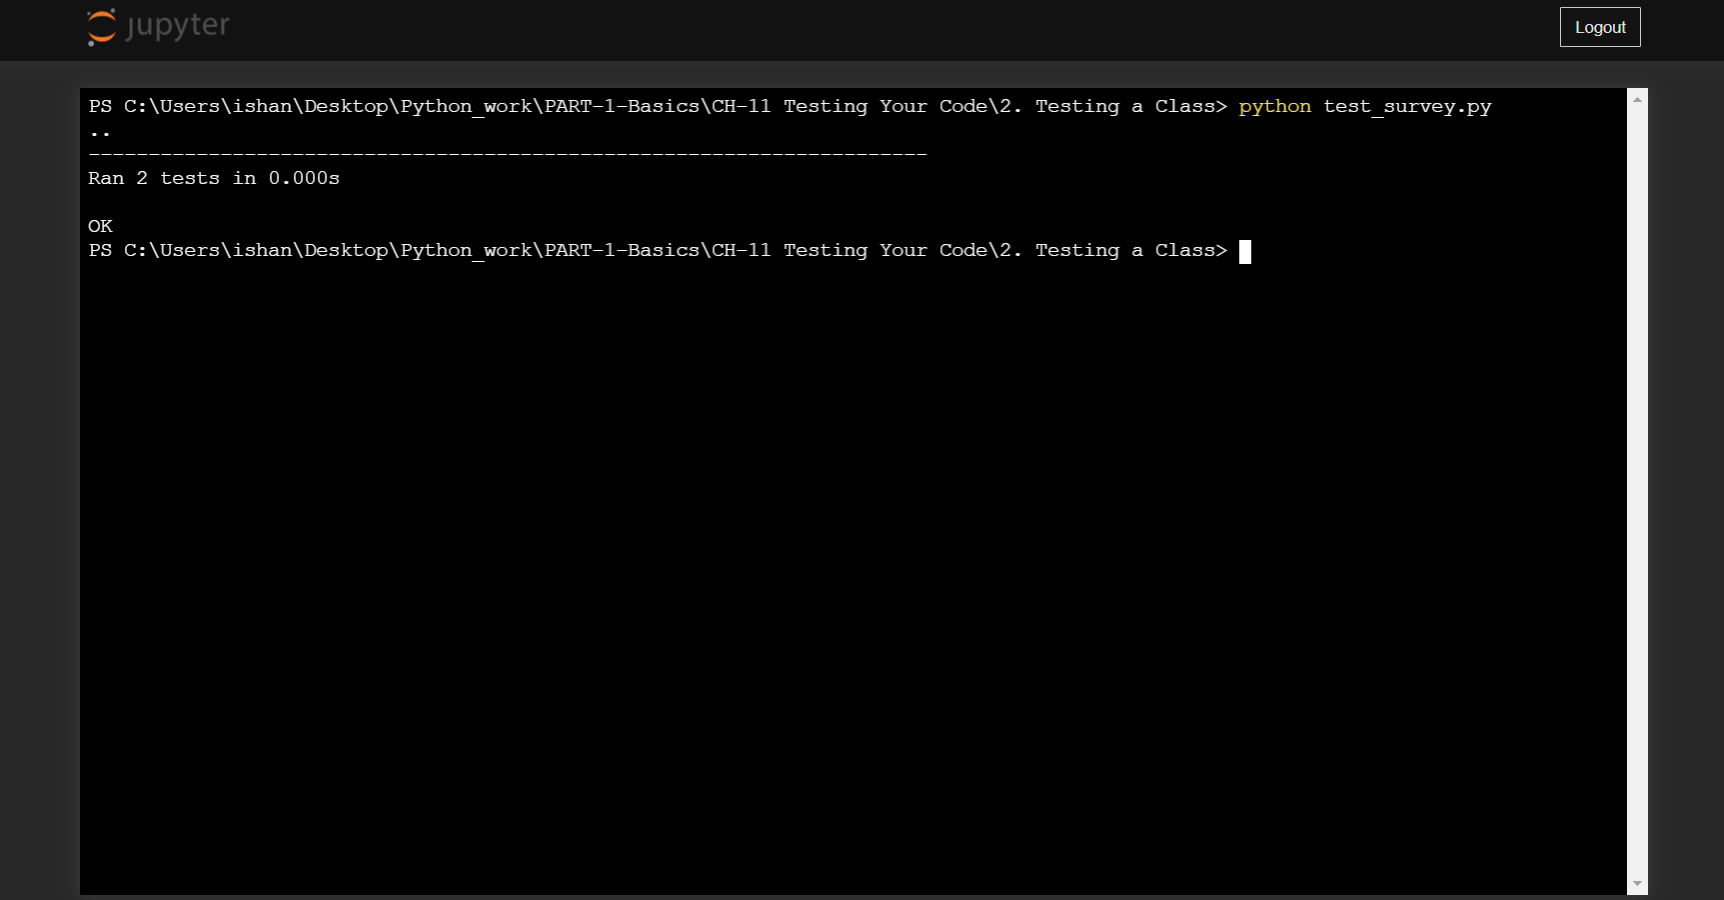

<pre>
<span style= 'background-color: yellow'>
The method setUp() does two things: it creates a survey instance,
and it creates a list of responses. 
<span style = 'color: rgb(100, 200, 200)'>Each of these is prefixed by self, so they can be used anywhere in the class.</span>
This makes the two test methods simpler, because neither one has to make a 
survey instance or a response.
</span>
</pre>

<pre>
<strong style='background-color:yellow; color: rgb(100, 200, 200);'>NOTE:</strong> <span style='color: yellow'>When a test case is running, Python prints one character for each unit test as it is
completed. A passing test prints a dot (<span style = 'color: rgb(100, 200, 200)'>.</span>), a test that results in an error prints an <span style = 'color: rgb(100, 200, 200)'>E</span>, and
a test that results in a failed assertion prints an <span style = 'color: rgb(100, 200, 200)'>F</span>. 
This is why you’ll see a different number of dots and characters on the first line of 
output when you run your test cases. If a test case takes a long time to run because 
it contains many unit tests, you can watch these results to get a sense of how many 
tests are passing.</span>
</pre>

<hr>